**Web Scraping Kurs JPY 2019**

Proses web scraping ini bersumber dari website : monexnews.com/kurs-valuta-asing.htm?kurs=JPY ,

dilakukan dengan tujuan untuk mengamati pergerakan kurs JPY (mata uang Jepang) pada tahun 2019. Hasil akhir dari kegiatan ini berupa plot/diagram yang menampilkan nilai rata-rata kurs JPY tiap bulannya.

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib

In [4]:
#tarik keseluruhan data dari website monex.news

url_get = requests.get('https://news.mifx.com/kurs-valuta-asing?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019')
soup = BeautifulSoup(url_get.content,"html.parser")
print(soup.prettify()[:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta content="en,in" http-equiv="Content-Language"/>
  <link href="https://news.mifx.com/kurs-valuta-asing.php" hreflang="en-ID" rel="alternate"/>
  <base href="https://news.mifx.com/" target="_self"/>
  <title>
   Kurs Dollar | USD | Nilai Tukar Dollar Hari Ini
  </title>
  <meta content="Kurs Dollar | USD | Nilai Tukar 


In [5]:
#ambil data table dari keseluruhan tampilan website

table = soup.find('table', attrs= {'class':'centerText newsTable2'})
print(table.prettify()[1:100])

table cellpadding="10" cellspacing="0" class="centerText newsTable2" width="100%">
 <tr class="colo


In [6]:
#ambil data pada tiap row dari table

tr = table.find_all('tr')
tr[:3]

[<tr class="colorWhite fontsize14 firstRow">
 <td>TANGGAL</td>
 <td>ASK</td>
 <td>BID</td>
 </tr>,
 <tr class="verySoftGreyBg">
 <td>31 Desember 2019</td>
 <td>128,62</td>
 <td>127,32</td>
 </tr>,
 <tr>
 <td>30 Desember 2019</td>
 <td>128,30</td>
 <td>127,02</td>
 </tr>]

In [7]:
#data berupa HTML diubah menjadi series

kursjp = []

for i in range(1, len(tr)):
    row = table.find_all('tr')[i]
    
    #get period
    period = row.find_all('td')[0].text
    period = period.strip()
    period = period.replace('\xa0',' ')
    
    #get ask
    ask = row.find_all('td')[1].text
    ask = ask.strip()
    
    #get bid
    bid = row.find_all('td')[2].text
    bid = bid.strip()
    
    kursjp.append((period,ask,bid))

kursjp = kursjp[::-1]
kursjp[:5]

[('02 Januari 2019', '132,89', '131,54'),
 ('03 Januari 2019', '135,44', '134,08'),
 ('04 Januari 2019', '133,51', '132,17'),
 ('07 Januari 2019', '130,86', '129,51'),
 ('08 Januari 2019', '129,84', '128,52')]

In [8]:
#data series diubah menjadi dataframe
kursjpy = pd.DataFrame(kursjp, columns = ('Date','Ask','Bid'))
kursjpy.head(2)

,Date,Ask,Bid
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"


In [9]:
#ubah tipe data pada tiap kolom

bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli',\
         'Agustus', 'September', 'Oktober', 'November', 'Desember']
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',\
         'August', 'September', 'October', 'November', 'December']

kursjpy['Date'] = kursjpy['Date'].replace(bulan, month, regex=True)
kursjpy['Date'] = kursjpy['Date'].astype('datetime64')

kursjpy[['Ask','Bid']] = kursjpy[['Ask','Bid']].replace(',', '.', regex=True)
kursjpy[['Ask','Bid']] = kursjpy[['Ask','Bid']].astype('float64')
kursjpy.dtypes

Date    datetime64[ns]
Ask            float64
Bid            float64
dtype: object

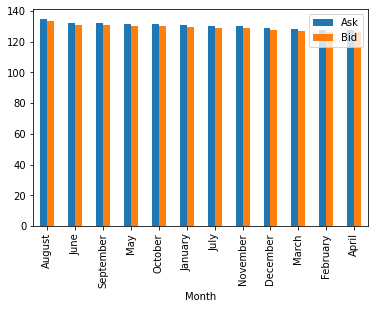

In [76]:
#visualisasi rata-rata ask dan bid tiap bulan (descending)

kursjpy['Month'] = kursjpy['Date'].dt.month_name()
tablekursjpy = kursjpy.drop(columns='Date').groupby(by='Month').mean()
tablekursjpy = tablekursjpy.sort_values('Ask', ascending = False)
tablekursjpy.plot.bar()

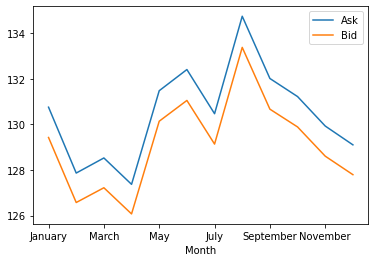

In [75]:
#visualisasi data berdasarkan urutan bulan

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']
table_kursjpy = tablekursjpy.reindex(month_order)
table_kursjpy.plot.line()

**Analisa:**

   Nilai rata-rata Bid dan Ask tiap bulannya berada pada range yang berdekatan, sedangkan fluktuasi nilainya cenderung berubah-ubah. Nilai tertinggi berada pada bulan Agustus dan terendah di bulan April. Akan tetapi dari Agustus hingga akhir tahun nilainya terus menerus turun, bahkan hingga nilainya lebih rendah dari nilai di bulan pertama tahun 2019.
    Keadaan ini menandakan adanya ketidakstabilan nilai jual-beli mata uang Yen sepanjang tahun 2019. 